In [12]:
from IPython.display import HTML
HTML("""
<style>
/* Make pandas HTML tables scroll horizontally */
.dataframe, table.dataframe {
  display: block;
  overflow-x: auto;
  white-space: nowrap;   /* prevents header/cells from wrapping awkwardly */
  max-width: 100%;
}
</style>
""")

# Analysis of Nuclear Energy in the United States

## Introduction
Nuclear energy has long been a controversial topic amongst policymakers, scientists, politicians, and the public due to concerns over safety, waste, and cost despite its role as a low-carbon energy source. The goal of this project is to analyze the Global Data on Sustainable Energy (2000–2020) dataset to examine U.S. nuclear trends and compare them to other energy sources. Questions this project aims to answer:

1. How has the use of nuclear energy changed over time compared to other energy sources in the United States?

2. How have changes in nuclear and renewable energy affected U.S. CO₂ emissions and energy efficiency?

3. How does the United States nuclear production compare to other countries?

## The Data
The data used in this project is from [kaggle](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy/data). This dataset contains global energy data from 2000 to 2020 with information such as electricity generation from nuclear and renewable sources, CO2 emissions, and economic metrics (GDP/population). In total, there are 20 key features in this dataset with over 3600 rows.

To start, I will import python libraries that are needed for analysis and visualization.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nuclear_df = pd.read_csv("global-data-on-sustainable-energy.csv")
nuclear_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


## Data Preprocessing
As you can see from the table above, many of the columns have null values. Since I will be exploring how the US compares to other countries later, I will check null values for the entire dataset. Handling null values is important because missing data can lead to misleading results. 

In [4]:
print(nuclear_df.shape)
nuclear_df.isna().sum()

(3649, 21)


Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

Wow! There are a lot of null values in this dataset, to continue I want to go explore each column and decide if the column can be dropped or if missing values should be filled in based on the type of data and its importance to the analysis. 

### Dropping Columns
Since only one of my questions is based on a global scale (How does the United States nuclear production compare to other countries?) the columns that are not essential and have a majority of null values can be dropped. Columns such as these can be dropped:

* Access to electricity (% of population) - not relevant to nuclear production

* Access to clean fuels for cooking - not relevant to nuclear production

* Renewable-electricity-generating-capacity-per-capita - capacity ≠ generation & large amount of null values

* Financial flows to developing countries (US $) - not relevant to nuclear production & there is majority of null values

* Renewables (% equivalent primary energy) - other columns already satisfy & there is majority of null values

* Land Area (Km2), Latitude, Longitude - not relevant to nuclear production

In [5]:
cols_to_drop = [
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Financial flows to developing countries (US $)",
    "Renewables (% equivalent primary energy)",
    "Land Area(Km2)",
    "Latitude",
    "Longitude"]

nuclear_df_dropped = nuclear_df.drop(columns=cols_to_drop)

nuclear_df_dropped

,Entity,Year,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2)
0,Afghanistan,2000,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,60
1,Afghanistan,2001,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,60
2,Afghanistan,2002,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,60
3,Afghanistan,2003,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60
4,Afghanistan,2004,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,38
3645,Zimbabwe,2017,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,38
3646,Zimbabwe,2018,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,38
3647,Zimbabwe,2019,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,38


### Filtering Out Countries without Nuclear Energy

Now we can see that the table has a lot less null values. Although, in the table we can see that many countries do not have access to nuclear energy denoted by the 0's in the *Electricity from nuclear (TWh)* column. We should filter these countries out to make the comparison more meaningful.

In [6]:
nuclear_df_cleaned = nuclear_df_dropped[nuclear_df_dropped["Electricity from nuclear (TWh)"] > 0]
nuclear_df_cleaned

,Entity,Year,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2)
105,Argentina,2000,9.85,50.37,5.99,28.89,40.914955,18849.810,3.69,1.322700e+05,-0.788999,7708.099115,17
106,Argentina,2001,11.51,42.91,6.54,37.04,50.387330,18210.120,3.59,1.252600e+05,-4.408840,7208.373114,17
107,Argentina,2002,11.62,39.70,5.39,36.06,51.078250,17275.256,3.99,1.174700e+05,-10.894485,2593.404563,17
108,Argentina,2003,10.82,46.73,7.03,34.38,46.982075,18326.521,3.97,1.276600e+05,8.837041,3349.806300,17
109,Argentina,2004,9.29,57.35,7.31,31.03,40.066883,19261.457,4.04,1.413800e+05,9.029573,4277.721573,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,United States,2016,9.46,2656.96,805.69,624.91,34.998875,78613.540,4.74,4.894500e+06,1.711427,58021.400500,36
3519,United States,2017,9.92,2540.17,804.95,707.19,37.315506,78289.010,4.62,4.819370e+06,2.332679,60109.655730,36
3520,United States,2018,10.12,2661.30,807.08,733.17,36.659092,80583.340,4.61,4.975310e+06,2.996464,63064.418410,36
3521,United States,2019,10.42,2588.21,809.41,760.76,37.759180,79489.016,4.51,4.817720e+06,2.161177,65279.529030,36


That looks a lot better! Now on a global scale, we have data that can be compared across countries that actually generate nuclear energy. This cleaned data allows us to make stronger connections and comparisons between the United States and other nations.

### United States Data Only

Since I will also be comparing energy sources within just the United States, I need a table of just data from the US. I will start by filtering the dataset to include only rows where the *Entity* is equal to "United States". Then I'll check for null values and drop the columns with all null values.

In [7]:
us_data = nuclear_df[nuclear_df["Entity"] == "United States"]

us_data.isna().sum()

Entity                                                               0
Year                                                                 0
Access to electricity (% of population)                              0
Access to clean fuels for cooking                                    0
Renewable-electricity-generating-capacity-per-capita                21
Financial flows to developing countries (US $)                      21
Renewable energy share in the total final energy consumption (%)     1
Electricity from fossil fuels (TWh)                                  0
Electricity from nuclear (TWh)                                       0
Electricity from renewables (TWh)                                    0
Low-carbon electricity (% electricity)                               0
Primary energy consumption per capita (kWh/person)                   0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          1
Value_co2_emissions_kt_by_country                                    1
Renewa

In [8]:
us_data_dropped = us_data.drop(columns=["Renewable-electricity-generating-capacity-per-capita", "Financial flows to developing countries (US $)"])
us_data_dropped

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3502,United States,2000,100.0,100.0,5.43,2697.28,753.89,350.93,29.058150,93999.860,6.73,5775810.000,4.027357,4.127484,36334.90878,36,9833517.0,37.09024,-95.712891
3503,United States,2001,100.0,100.0,4.68,2678.68,768.83,280.06,28.138706,90772.180,6.54,5748260.000,3.421371,0.998341,37133.24281,36,9833517.0,37.09024,-95.712891
3504,United States,2002,100.0,100.0,4.84,2727.83,780.06,336.34,29.040926,91201.060,6.50,5593029.785,4.015507,1.741695,38023.16111,36,9833517.0,37.09024,-95.712891
3505,United States,2003,100.0,100.0,5.33,2756.03,763.73,349.18,28.765244,90619.110,6.33,5658990.234,4.180040,2.861211,39496.48588,36,9833517.0,37.09024,-95.712891
3506,United States,2004,100.0,100.0,5.48,2818.28,788.53,345.14,28.686348,91504.484,6.22,5738290.039,4.101511,3.798891,41712.80107,36,9833517.0,37.09024,-95.712891
3507,United States,2005,100.0,100.0,5.84,2899.96,781.99,353.04,28.129686,90654.530,6.04,5753490.234,4.219231,3.513214,44114.74778,36,9833517.0,37.09024,-95.712891
3508,United States,2006,100.0,100.0,6.40,2878.56,787.22,381.16,28.870703,89067.040,5.82,5653080.078,4.678861,2.854972,46298.73144,36,9833517.0,37.09024,-95.712891
3509,United States,2007,100.0,100.0,6.30,2988.24,806.42,347.91,27.865068,89395.140,5.81,5736319.824,4.373009,1.876171,47975.96770,36,9833517.0,37.09024,-95.712891
3510,United States,2008,100.0,100.0,6.85,2924.21,806.21,377.11,28.808554,86378.650,5.67,5558379.883,5.004550,-0.136580,48382.55845,36,9833517.0,37.09024,-95.712891
3511,United States,2009,100.0,100.0,7.35,2725.41,798.85,415.56,30.823996,81376.180,5.53,5156430.176,5.800006,-2.536757,47099.98047,36,9833517.0,37.09024,-95.712891


There are only null values in 2020, probably because when the dataset was posted, the most recent year’s statistics had not yet been fully reported or verified. However, I believe these null values can be interpolated. In the *Renewable energy share in the total final energy consumption (%)* column, throughout the 20 years we can see that there is an increasing linear trend. There is also a decreasing linear trend in the *Energy intensity level of primary energy (MJ/$2017 PPP GDP)* column. We can use linear interpolation to fill in these values. 

In [9]:
interpolated_cols = [
    "Renewable energy share in the total final energy consumption (%)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)"
]

us_data_dropped[interpolated_cols] = us_data_dropped[interpolated_cols].interpolate(method="linear")

us_data_dropped[us_data_dropped["Year"] == 2020]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3522,United States,2020,100.0,100.0,10.42,2431.9,789.88,821.4,39.8518,73236.14,4.51,NaN,10.532232,-3.404592,63593.44362,36,9833517.0,37.09024,-95.712891


Finally, we can just use the previous years *Value_co2_emissions_kt_by_country* number as it didn't change much from 2015-2020.

In [10]:
us_data_dropped.loc[us_data_dropped["Year"] == 2020, "Value_co2_emissions_kt_by_country"] = 4817720.215
us_data_dropped[us_data_dropped["Year"] == 2020]

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3522,United States,2020,100.0,100.0,10.42,2431.9,789.88,821.4,39.8518,73236.14,4.51,4817720.215,10.532232,-3.404592,63593.44362,36,9833517.0,37.09024,-95.712891


Now all of our data is preprocessed!

## Data Understanding and Visualization

Now that all of our data has been cleaned of unrelated and null values, we can start to answer our three key questions. Let's start with the question: How has the use of nuclear energy changed over time compared to other energy sources in the United States?

### Lineplot of U.S. Electricity Generation by Source

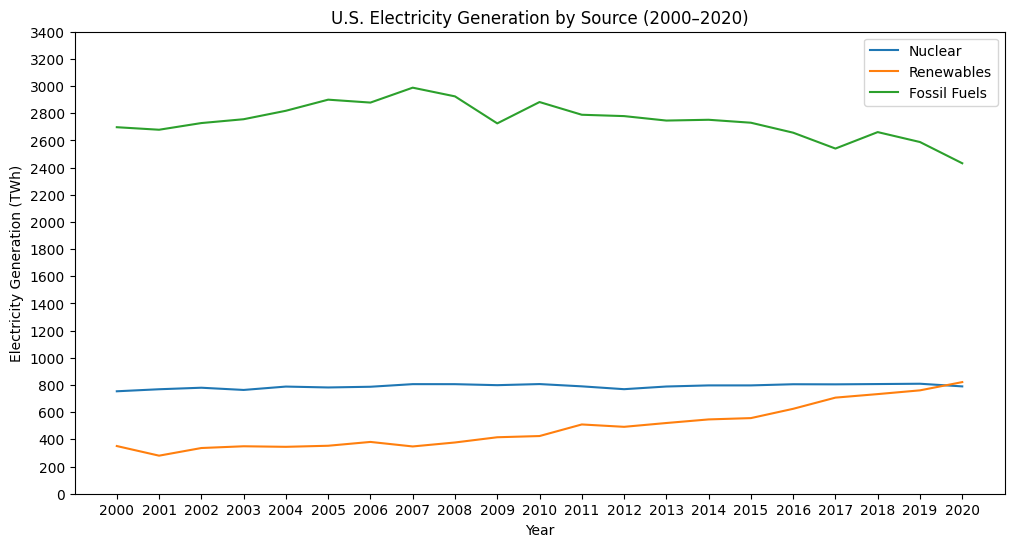

In [11]:
plt.figure(figsize=(12,6))

sns.lineplot(data=us_data_dropped, x="Year", y="Electricity from nuclear (TWh)", label="Nuclear")
sns.lineplot(data=us_data_dropped, x="Year", y="Electricity from renewables (TWh)", label="Renewables")
sns.lineplot(data=us_data_dropped, x="Year", y="Electricity from fossil fuels (TWh)", label="Fossil Fuels")

plt.title("U.S. Electricity Generation by Source (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Electricity Generation (TWh)")
plt.legend()

plt.yticks(ticks=range(0, 3501, 200)) 
plt.xticks(ticks=us_data_dropped["Year"].unique())

plt.show()


From this lineplot, we can observe that the United States gets most of its electricity from fossil fuels. From 2000-2007, there was an increasing trend of fossil fuel use. In 2008-2009 there was a significant dip in electricity production, which could be a result from the 2008 global financial crisis when reduced economic activity lowered electricity demand. In the following years, 2010-2020, fossil fuel electricity generation shows a declining trend, while renewable energy sources continue to rise. Despite the rise of renewable energy generation in the US, nuclear energy seemed to be left out as it remained around 800TWh throughout 20 years.

What could this mean? I believe this reflects the persistent stigma surrounding nuclear energy. Although being a low-carbon source of electricity, people are concerned about the safety, waste, and cost of nuclear energy. I think this shows that between the years 2000-2020, U.S. citizens became more favorable toward renewable energy sources like wind, hydro, and solar. 

From a future perspective, I think that this graph would look a little different if the data were up-to-date. I say this because of the growing need for energy to power data centers and AI. I believe companies will be looking at nuclear energy to support this increase in demand of energy.